<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:12px;"><i>by <a href="https://webgrec.ub.edu/webpages/tmp/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=71605" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/03_CNN_Autoencoder.ipynb"  target="_blank"
          download="03_CNN_Autoencoder">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{III}$. Convolutional Neural Networks and Autoencoders (using Keras)

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/en/uab-official-masters-degrees-study-guides/) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

Tutorial 3

This notebook shows how to:
- implement a neural network using the Keras module
- recognize images with dense nets (supervised learning)
- recognize images with convolutional nets (supervised learning)
- implement image denoising using pseudo-encoders (almost unsupervised learning)
- generate images: U-net, GAN, cGAN and VAE (unsupervised learning)
- anomaly detection with a 1D Autoencoder (unsupervised learning)

**References**:

[1] [Machine Learning for Physicists](https://machine-learning-for-physicists.org/) by Florian Marquardt.<br>
[2] [Keras](https://keras.io/getting_started/): a deep learning API written in Python.<br>
[3] [Tensorflow](https://www.tensorflow.org/api_docs/python/tf): an open source machine learning platform.<br>
[4] [MNIST handwritten numbers](http://yann.lecun.com/exdb/mnist/).<br>
[5] [pix2pix](https://www.tensorflow.org/tutorials/generative/pix2pix): Image-to-image translation with a conditional GAN.<br>
[6] VAE example on [Towards data science](https://towardsdatascience.com/variational-autoencoders-as-generative-models-with-keras-e0c79415a7eb).<br>
[7] https://github.com/kartikgill/Autoencoders.<br>
[8] https://github.com/dhanushkamath/VariationalAutoencoder. <br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports:-Basically-numpy,-matplotlib-and-tensorflow" data-toc-modified-id="Imports:-Basically-numpy,-matplotlib-and-tensorflow-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Imports: Basically numpy, matplotlib and tensorflow</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Image-recognition-with-a-perceptron-NN-(Introduction-to-Keras)" data-toc-modified-id="Image-recognition-with-a-perceptron-NN-(Introduction-to-Keras)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image recognition with a perceptron NN (Introduction to Keras)</a></span><ul class="toc-item"><li><span><a href="#Test-out-things" data-toc-modified-id="Test-out-things-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Test out things</a></span></li></ul></li><li><span><a href="#Image-recognition-with-a-CNN" data-toc-modified-id="Image-recognition-with-a-CNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image recognition with a CNN</a></span></li><li><span><a href="#Image-Denoiser-(almost-unsupervised-learning)" data-toc-modified-id="Image-Denoiser-(almost-unsupervised-learning)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Image Denoiser (almost unsupervised learning)</a></span></li><li><span><a href="#Generative-Adversarial-Neural-Networks-(pix2pix)" data-toc-modified-id="Generative-Adversarial-Neural-Networks-(pix2pix)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generative Adversarial Neural Networks (pix2pix)</a></span></li><li><span><a href="#Autoencoder-for-dimension-reduction" data-toc-modified-id="Autoencoder-for-dimension-reduction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Autoencoder for dimension reduction</a></span></li><li><span><a href="#Autoencoders-(unsupervised-training)" data-toc-modified-id="Autoencoders-(unsupervised-training)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Autoencoders (unsupervised training)</a></span></li><li><span><a href="#Timeseries-anomaly-detection-using-an-Autoencoder" data-toc-modified-id="Timeseries-anomaly-detection-using-an-Autoencoder-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Timeseries anomaly detection using an Autoencoder</a></span><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Load the data</a></span><ul class="toc-item"><li><span><a href="#Timeseries-data-without-anomalies" data-toc-modified-id="Timeseries-data-without-anomalies-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Timeseries data without anomalies</a></span></li><li><span><a href="#Timeseries-data-with-anomalies" data-toc-modified-id="Timeseries-data-with-anomalies-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Timeseries data with anomalies</a></span></li></ul></li><li><span><a href="#Prepare-training-data" data-toc-modified-id="Prepare-training-data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Prepare training data</a></span></li><li><span><a href="#Build-a-model" data-toc-modified-id="Build-a-model-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Build a model</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Detecting-anomalies" data-toc-modified-id="Detecting-anomalies-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Detecting anomalies</a></span><ul class="toc-item"><li><span><a href="#Compare-recontruction" data-toc-modified-id="Compare-recontruction-8.5.1"><span class="toc-item-num">8.5.1&nbsp;&nbsp;</span>Compare recontruction</a></span></li><li><span><a href="#Prepare-test-data" data-toc-modified-id="Prepare-test-data-8.5.2"><span class="toc-item-num">8.5.2&nbsp;&nbsp;</span>Prepare test data</a></span></li></ul></li><li><span><a href="#Plot-anomalies" data-toc-modified-id="Plot-anomalies-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Plot anomalies</a></span></li></ul></li></ul></div>

## Imports: Basically numpy, matplotlib and tensorflow
`!pip install tensorflow`

In [3]:
import tensorflow as tf

from tensorflow.keras import Sequential # Sequential is the neural-network class
from tensorflow.keras import Model
from tensorflow.keras.layers import Input  # Let's see how to use it
from tensorflow.keras.layers import Dense, GaussianDropout  # Fully connected
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D  # for CNN
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape  # For Autoencoders
from tensorflow.keras import optimizers # to choose more advanced optimizers like 'adam'
from tensorflow.keras.datasets import mnist  # dataset of handwritten numbers

import numpy as np
import random

import pandas as pd

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# for subplots within subplots:
from matplotlib import gridspec

# for nice inset colorbars: (approach changed from lecture 1 'Visualization' notebook)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import time, sleep

# Set up a random number generator with a fixed seed, so that
# running this whole notebook repeatedly should always give
# the same result (useful for debugging)
rng = np.random.RandomState(23455)

## Import data

The loader for the MNIST image data was taken from Nielsen's online book,

http://neuralnetworksanddeeplearning.com/chap1.html

See specifically the following link, for downloading the MNIST image data (we only need the mnist.pkl.gz package inside the 'data' subdirectory; store it inside the present directory of the notebook):
https://github.com/mnielsen/neural-networks-and-deep-learning/archive/master.zip


In [ ]:
"""
mnist_loader
~~~~~~~~~~~~

taken from Nielsen's online book:
http://neuralnetworksanddeeplearning.com/chap1.html


A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

def load_images():
    (train_val_X, train_val_y), (test_X, test_y) = mnist.load_data()

    # to convert values from 0 to 255 into range 0 to 1.
    train_val_X = train_val_X.astype('float32') / 255.
    test_X = test_X.astype('float32') / 255.
    
    # adapt this if using `channels_first` image data format
    train_val_X = np.reshape(train_val_X, (len(train_val_X), 28, 28, 1)) 
    test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))
    
    train_X = train_val_X[:-10000]
    val_X = train_val_X[-10000:]

    train_y = train_val_y[:-10000]
    val_y = train_val_y[-10000:]
    
    return (train_X, train_y), (val_X, val_y), (test_X, test_y)


def flatten(dataset):
    new_dataset = np.zeros([dataset.shape[0], dataset.shape[1]*dataset.shape[2]])

    for idx, item in enumerate(dataset):
        new_dataset[idx, :] = dataset[idx].flatten()
    
    return new_dataset


def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    
    tr_imgs, vl_imgs, te_imgs = load_images()
    
    training_data = (flatten(tr_imgs[0]), tr_imgs[1])
    validation_data = (flatten(vl_imgs[0]), vl_imgs[1])
    test_data = (flatten(te_imgs[0]), te_imgs[1])
    
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.a

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    
    global training_inputs, training_results
    global validation_inputs, validation_results
    global test_inputs, test_results
    global num_samples, numpixels, num_test_samples
    
    tr_d, va_d, te_d = load_data()
    
    numpixels = tr_d[0].shape[1]
    
    num_samples=len(tr_d[0])
    training_inputs=np.zeros([num_samples,numpixels])
    training_results=np.zeros([num_samples,10])    
    for j in range(num_samples):
        training_inputs[j,:] = np.reshape(tr_d[0][j], (numpixels))
        training_results[j,:] = vectorized_result(tr_d[1][j])
#    validation_inputs = [reshape(x, (numpixels)) for x in va_d[0]]
#    validation_results = [vectorized_result(y) for y in va_d[1]]

    num_test_samples=len(te_d[0])
    test_inputs=np.zeros([num_test_samples,numpixels])
    test_results=np.zeros([num_test_samples,10])    
    for j in range(num_test_samples):
        test_inputs[j,:] = np.reshape(te_d[0][j], (numpixels))
        test_results[j,:] = vectorized_result(te_d[1][j])

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10))
    e[j] = 1.0
    return e

## Image recognition with a perceptron NN (Introduction to Keras)

In [ ]:
# initialize the network
def init_net():
    global net, numpixels
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Dense(30, input_shape=(numpixels,), activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.SGD(learning_rate=1.0), 
                metrics=['categorical_accuracy'])

In [ ]:
# initialize the network
def init_net_large():
    global net, numpixels
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Dense(100, input_shape=(numpixels,), activation='relu'))
    net.add(GaussianDropout(0.1))
    net.add(Dense(50, activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.SGD(learning_rate=1.0), 
                metrics=['categorical_accuracy'])

In [ ]:
def test_on(start,stop,dontprint=False, is_cnn=False):
    global test_inputs, test_results
    global net, predictions_probs, predictions, true_labels
    
    if is_cnn:
        inputs = np.reshape(test_inputs[start:stop,:], [stop-start, 28, 28])
    else:
        inputs = test_inputs[start:stop,:]
        
    
    predictions_probs=net.predict_on_batch(inputs)
    predictions=np.argmax(predictions_probs,axis=1)
    if dontprint==False:
        print("Predictions: ", predictions)
    true_labels=np.argmax(test_results[start:stop,:], axis=1)
    if dontprint==False:
        print("True labels: ", true_labels)

In [ ]:
def display_image(which):
    global test_inputs
    
    plt.imshow(np.reshape(test_inputs[which,:],[28,28]),interpolation='nearest', cmap='binary')
    plt.show()

In [ ]:
def display_image_array(which):
    global test_inputs
    
    numcolumns=8
    BigImage=np.zeros([28*numcolumns,28*numcolumns])
    for j in range(len(which)):
        x=(j%numcolumns)*28
        y=int(j/numcolumns)*28
        BigImage[x:x+28,y:y+28]=np.reshape(test_inputs[which[j],:],[28,28])
    plt.imshow(BigImage,interpolation='nearest', cmap='binary')
    plt.show()

In [ ]:
def display_mistakes(maxnum):
    global test_inputs, rest_results, num_test_samples
    global true_labels, predictions, predictions_probs
    
    test_on(0,num_test_samples,dontprint=True)
    which=np.where(true_labels!=predictions)[0]
    for j in which:
        if j<maxnum:
            display_image(j)
            print("True ", true_labels[j], " - Predicted ", predictions[j], " with prob. ", predictions_probs[j,predictions[j]])
        

### Test out things

In [ ]:
load_data_wrapper() # load all the MNIST images

In [ ]:
training_inputs.shape

In [ ]:
psi=training_inputs-np.sum(training_inputs,axis=0)/num_samples

In [ ]:
plt.imshow(np.reshape(psi[4,:],[28,28]))

In [ ]:
psi.shape

In [ ]:
display_image_array(range(8*8))

In [ ]:
training_inputs.shape

In [ ]:
init_net()  # init_net_large()  # 
net.summary()

In [ ]:
batchsize=100
batches=int(num_samples/batchsize)-1
costs=np.zeros(batches)

t0 = time()
for j in range(batches):
    costs[j]=net.train_on_batch(training_inputs[j*batchsize:(j+1)*batchsize,:], 
                                training_results[j*batchsize:(j+1)*batchsize,:])[0]
t_done = time() - t0

print("Elapsed time: %.2f s (%.4f s/step)" % (t_done, t_done/batches))
plt.plot(costs,linewidth=3)
plt.show()

In [ ]:
test_on(0,20)
# see which fraction of the test samples is classified incorrectly
test_on(0,num_test_samples,dontprint=True)
which=np.where(true_labels!=predictions)[0]
print("Wrong predictions: ", len(which)/num_test_samples*100, "%")

In [ ]:
# use the keras "fit" function to go through the whole data set many times ('epochs'), 
# and even set aside some validation samples
epochs = 30
t0 = time()
history=net.fit(training_inputs,training_results,batch_size=100,
                epochs=epochs,validation_split=0.1)
t_done = time() - t0

print("Elapsed time: %.2f s (%.4f s/epoch)" % (t_done, t_done/epochs))

In [ ]:
# see which fraction of the test samples is classified incorrectly
test_on(0,num_test_samples,dontprint=True)
which=np.where(true_labels!=predictions)[0]
print("Wrong predictions: ", len(which)/num_test_samples*100, "%")

In [ ]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3)
plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()
#fig.savefig("Handwritten_MNIST_Fig1_Accuracy.pdf")
#fig.savefig("Handwritten_MNIST_Fig2_AccuracyAndValidation.pdf")
#fig.savefig("Handwritten_MNIST_Fig4_100_50_DropOut_AccuracyAndValidation.pdf")

In [ ]:
display_mistakes(100)

## Image recognition with a CNN

In [ ]:
# initialize the network
def cnn_simplest_net(M):
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Conv2D(input_shape=(M,M,1), filters=7, kernel_size=[5,5],
                   activation='relu', padding='same'))
    net.add(AveragePooling2D(pool_size=4))
    net.add(Flatten())
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.SGD(learning_rate=1.0), 
                metrics=['categorical_accuracy'])
    
    return net

In [ ]:
# initialize the network
def cnn_net(M):
    net = Sequential()
    # note: batch_input_shape is (batchsize,timesteps,data_dim)
    net.add(Conv2D(input_shape=(M,M,1), filters=8, kernel_size=[5,5],
                   activation='relu', padding='same'))
    net.add(AveragePooling2D(pool_size=2))
    net.add(Conv2D(input_shape=(M,M,1), filters=8, kernel_size=[5,5],
                   activation='relu', padding='same'))
    net.add(AveragePooling2D(pool_size=2))
    net.add(Flatten())
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.Adam(learning_rate=0.01), 
                metrics=['categorical_accuracy'])
    
    return net

In [ ]:
net = cnn_net(int(np.sqrt(numpixels)))  # cnn_simplest_net(int(np.sqrt(numpixels)))  # 
net.summary()

In [ ]:
train_data = np.reshape(training_inputs, [50000, 28, 28])

epochs = 3
t0 = time()
history=net.fit(train_data,training_results,batch_size=100,
                epochs=epochs,validation_split=0.1)
t_done = time() - t0

print("Elapsed time: %.2f s (%.4f s/epoch)" % (t_done, t_done/epochs))

In [ ]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3)
plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()
#fig.savefig("Handwritten_MNIST_Fig1_Accuracy.pdf")
#fig.savefig("Handwritten_MNIST_Fig2_AccuracyAndValidation.pdf")
#fig.savefig("Handwritten_MNIST_Fig4_100_50_DropOut_AccuracyAndValidation.pdf")

In [ ]:
# see which fraction of the test samples is classified incorrectly
test_on(0,num_test_samples,dontprint=True, is_cnn=True)
which=np.where(true_labels!=predictions)[0]
print("Wrong predictions: ", len(which)/num_test_samples*100, "%")

## Image Denoiser (almost unsupervised learning)

*Code based on [this Keras example](https://keras.io/examples/vision/autoencoder/)*.

In [ ]:
tr_imgs, vl_imgs, te_imgs = load_images()

train_X = tr_imgs[0]
val_X = vl_imgs[0]
test_X = te_imgs[0]

noise_factor = 0.5
#np.random.normal => random means to obtain random samples and normal means normal or gaussian distribution, i.e. random sample from gaussian distribution
train_X_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)  
val_X_noisy = val_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=val_X.shape) 
test_X_noisy = test_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_X.shape) 

# to make values in the range of 0 to 1, if values < 0 then they will be equal to 0 and values > 1 then they will be equal to 1.
train_X_noisy = np.clip(train_X_noisy, 0., 1.)   
val_X_noisy = np.clip(val_X_noisy, 0., 1.)
test_X_noisy = np.clip(test_X_noisy, 0., 1.)

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_X[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_X_noisy[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
Input_img = Input(shape=(28, 28, 1))  


x1 = Conv2D(4, (3, 3), activation='relu', padding='same')(Input_img)
x1 = MaxPool2D( (2, 2), padding='same')(x1)
x2 = Conv2D(8, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2), padding='same')(x2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
encoded    = MaxPool2D( (2, 2), padding='same')(x3)

# decoding architecture
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
x2 = UpSampling2D((2, 2))(x2)
x1 = Conv2D(4, (3, 3), activation='relu')(x2)
x1 = UpSampling2D((2, 2))(x1)
decoded   = Conv2D(1, (3, 3), padding='same')(x1)


autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

a_e = autoencoder.fit(train_X_noisy, train_X,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X_noisy, test_X),
                callbacks=[early_stopper])

In [ ]:
# to predict the reconstructed images for the original images...
pred = autoencoder.predict(test_X_noisy)

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(test_X[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(test_X_noisy[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

# to visualize reconstructed images(output of autoencoder)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(pred[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

## Generative Adversarial Neural Networks (pix2pix)

Go to `003b_pix2pix.ipynb` notebook.

## Autoencoder for dimension reduction

Code based on [this example on *Towards data science*](https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html).

In [ ]:
# Load the MNIST data set
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0., 1.]
# x_train = x_train / 255.
# x_test = x_test / 255.

tr_imgs, vl_imgs, te_imgs = load_images()

x_train = tr_imgs[0]
x_val = vl_imgs[0]
x_test = te_imgs[0]
y_test = te_imgs[1]

# Take a look at the dataset
n_samples = 10
idx = random.sample(range(x_train.shape[0]), n_samples)
plt.figure(figsize=(15,4))
for i in range(n_samples):
    plt.subplot(1, n_samples, i+1)
    plt.imshow(x_train[idx[i]].squeeze());
    plt.xticks([], [])
    plt.yticks([], [])

In [ ]:
# This is the dimension of the latent space (encoding space)
latent_dim = 2

# Images are 28 by 28
img_shape = (x_train.shape[1], x_train.shape[2])

encoder = Sequential([
    Flatten(input_shape=img_shape),
    Dense(192, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(latent_dim, name='encoder_output')
])

decoder = Sequential([
    Dense(64, activation='sigmoid', input_shape=(latent_dim,)),
    Dense(128, activation='sigmoid'),
    Dense(img_shape[0] * img_shape[1], activation='relu'),
    Reshape(img_shape)
])

In [ ]:
class TestEncoder(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test, ax):
        super(TestEncoder, self).__init__()
        self.x_test = x_test
        self.y_test = y_test
        self.ax = ax
        self.current_epoch = 0

    def on_epoch_begin(self, epoch, logs={}):
        self.current_epoch = self.current_epoch + 1
        encoder_model = Model(inputs=self.model.input,
                              outputs=self.model.get_layer('encoder_output').output)
        encoder_output = encoder_model(self.x_test)
        plt.subplot(4, 3, self.current_epoch)
        plt.scatter(encoder_output[:, 0],
                    encoder_output[:, 1], s=20, alpha=0.8,
                    cmap='Set1', c=self.y_test[0:x_test.shape[0]])
        plt.xlim(-9, 9)
        plt.ylim(-9, 9)
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
plt.figure(figsize=(15,15))
model_history = autoencoder.fit(x_train, x_train, epochs=12, batch_size=32, verbose=0,
                                callbacks=[TestEncoder(x_test[0:500], y_test[0:500])])


In [ ]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [ ]:
n_samples = 40
fake_sample = np.random.uniform(low=-20, high=20, size=(n_samples, 2))
plt.figure(figsize=(15,5))
for i in range(n_samples):
    plt.subplot(4, n_samples//4, i+1)
    fake_encoding = np.array([fake_sample[i]])
    fake_digit = decoder(fake_encoding).numpy().squeeze() 
    plt.imshow(fake_digit);
    plt.xticks([], [])
    plt.yticks([], [])

In [ ]:
Nplot = 21
plt.figure(figsize=(15,15))
idx = 0
for ix in np.linspace(-9, 9, Nplot):
    for iy in np.linspace(-9, 9, Nplot):
        idx += 1
        plt.subplot(Nplot, Nplot, idx)
        fake_encoding = np.expand_dims(np.array([ix, iy]), 0)
        fake_digit = decoder(fake_encoding).numpy().squeeze() 
        plt.imshow(fake_digit);
        plt.xticks([], [])
        plt.yticks([], [])

## Autoencoders (unsupervised training)

Go to https://github.com/kartikgill/Autoencoders/blob/main/Variational%20Autoencoder.ipynb

Go to `003c_random_face_generator.ipynb` notebook.

## Timeseries anomaly detection using an Autoencoder

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

**Author:** [pavithrasv](https://github.com/pavithrasv)<br>
**Date created:** 2020/05/31<br>
**Last modified:** 2020/05/31<br>

This script demonstrates how you can use a reconstruction convolutional autoencoder model to detect anomalies in timeseries data.

### Load the data

We will use the [Numenta Anomaly Benchmark(NAB)](
https://www.kaggle.com/boltzmannbrain/nab) dataset. It provides artifical
timeseries data containing labeled anomalous periods of behavior. Data are
ordered, timestamped, single-valued metrics.

We will use the `art_daily_small_noise.csv` file for training and the
`art_daily_jumpsup.csv` file for testing. The simplicity of this dataset
allows us to demonstrate anomaly detection effectively.

In [4]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

Quick look at the data

In [5]:
print(df_small_noise.head())
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


Let's visualize the data

#### Timeseries data without anomalies

We will use the following data for training.

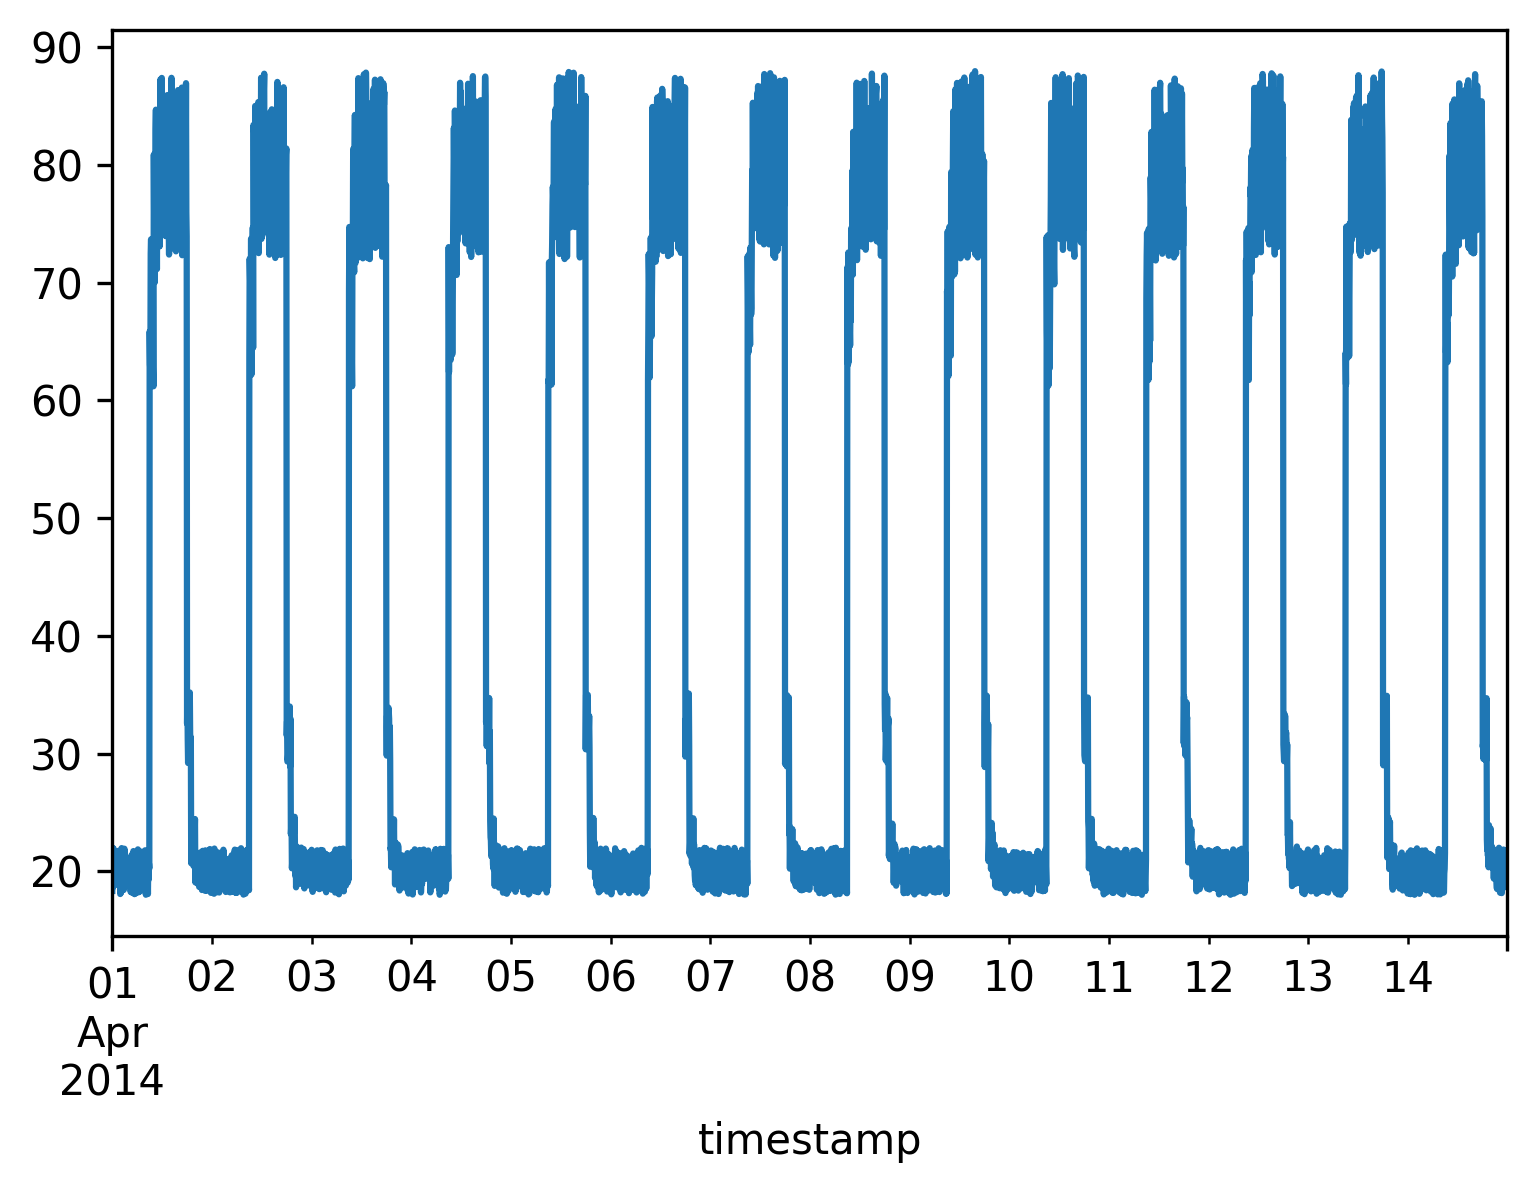

In [6]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

#### Timeseries data with anomalies

We will use the following data for testing and see if the sudden jump up in the
data is detected as an anomaly.

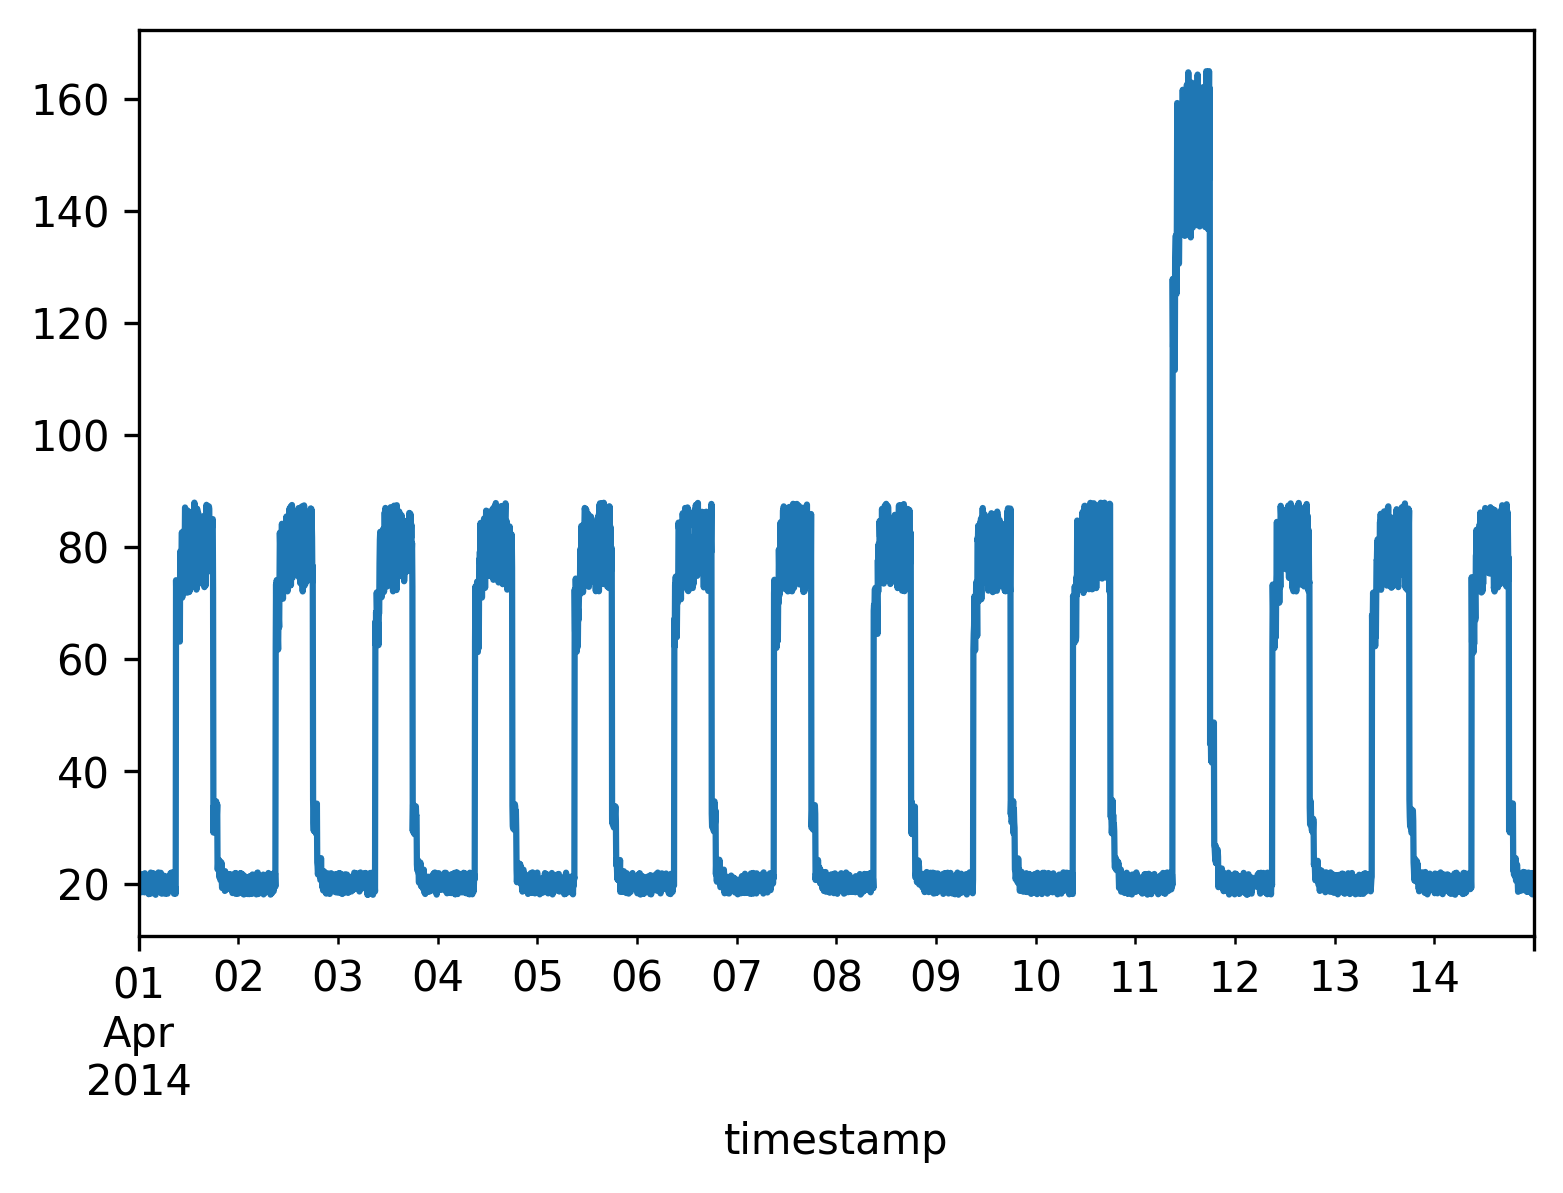

In [7]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

### Prepare training data

Get data values from the training timeseries data file and normalize the
`value` data. We have a `value` for every 5 mins for 14 days.

-   24 * 60 / 5 = **288 timesteps per day**
-   288 * 14 = **4032 data points** in total

In [8]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


Create sequences combining `TIME_STEPS` contiguous data values from the
training data.

In [9]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


### Build a model

We will build a convolutional reconstruction autoencoder model. The model will
take input of shape `(batch_size, sequence_length, num_features)` and return
output of the same shape. In this case, `sequence_length` is 288 and
`num_features` is 1.

In [13]:
layers = tf.keras.layers

model = tf.keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 144, 32)           256       
                                                                 
 dropout_2 (Dropout)         (None, 144, 32)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_3 (Conv1DT  (None, 144, 16)          1808      
 ranspose)                                                       
                                                                 
 dropout_3 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_4 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                            

### Train the model

Please note that we are using `x_train` as both the input and the target
since this is a reconstruction model.

In [15]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 4s 107ms/step - loss: 0.6005 - val_loss: 0.2460
Epoch 2/50
27/27 [==============================] - 2s 75ms/step - loss: 0.1042 - val_loss: 0.0483
Epoch 3/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0575 - val_loss: 0.0340
Epoch 4/50
27/27 [==============================] - 3s 96ms/step - loss: 0.0459 - val_loss: 0.0284
Epoch 5/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0400 - val_loss: 0.0247
Epoch 6/50
27/27 [==============================] - 3s 99ms/step - loss: 0.0361 - val_loss: 0.0244
Epoch 7/50
27/27 [==============================] - 3s 103ms/step - loss: 0.0331 - val_loss: 0.0239
Epoch 8/50
27/27 [==============================] - 3s 95ms/step - loss: 0.0311 - val_loss: 0.0241
Epoch 9/50
27/27 [==============================] - 3s 94ms/step - loss: 0.0291 - val_loss: 0.0244
Epoch 10/50
27/27 [==============================] - 3s 102ms/step - loss: 0.0276 - val_loss: 0.0265
Epoch 

Let's plot training and validation loss to see how the training went.

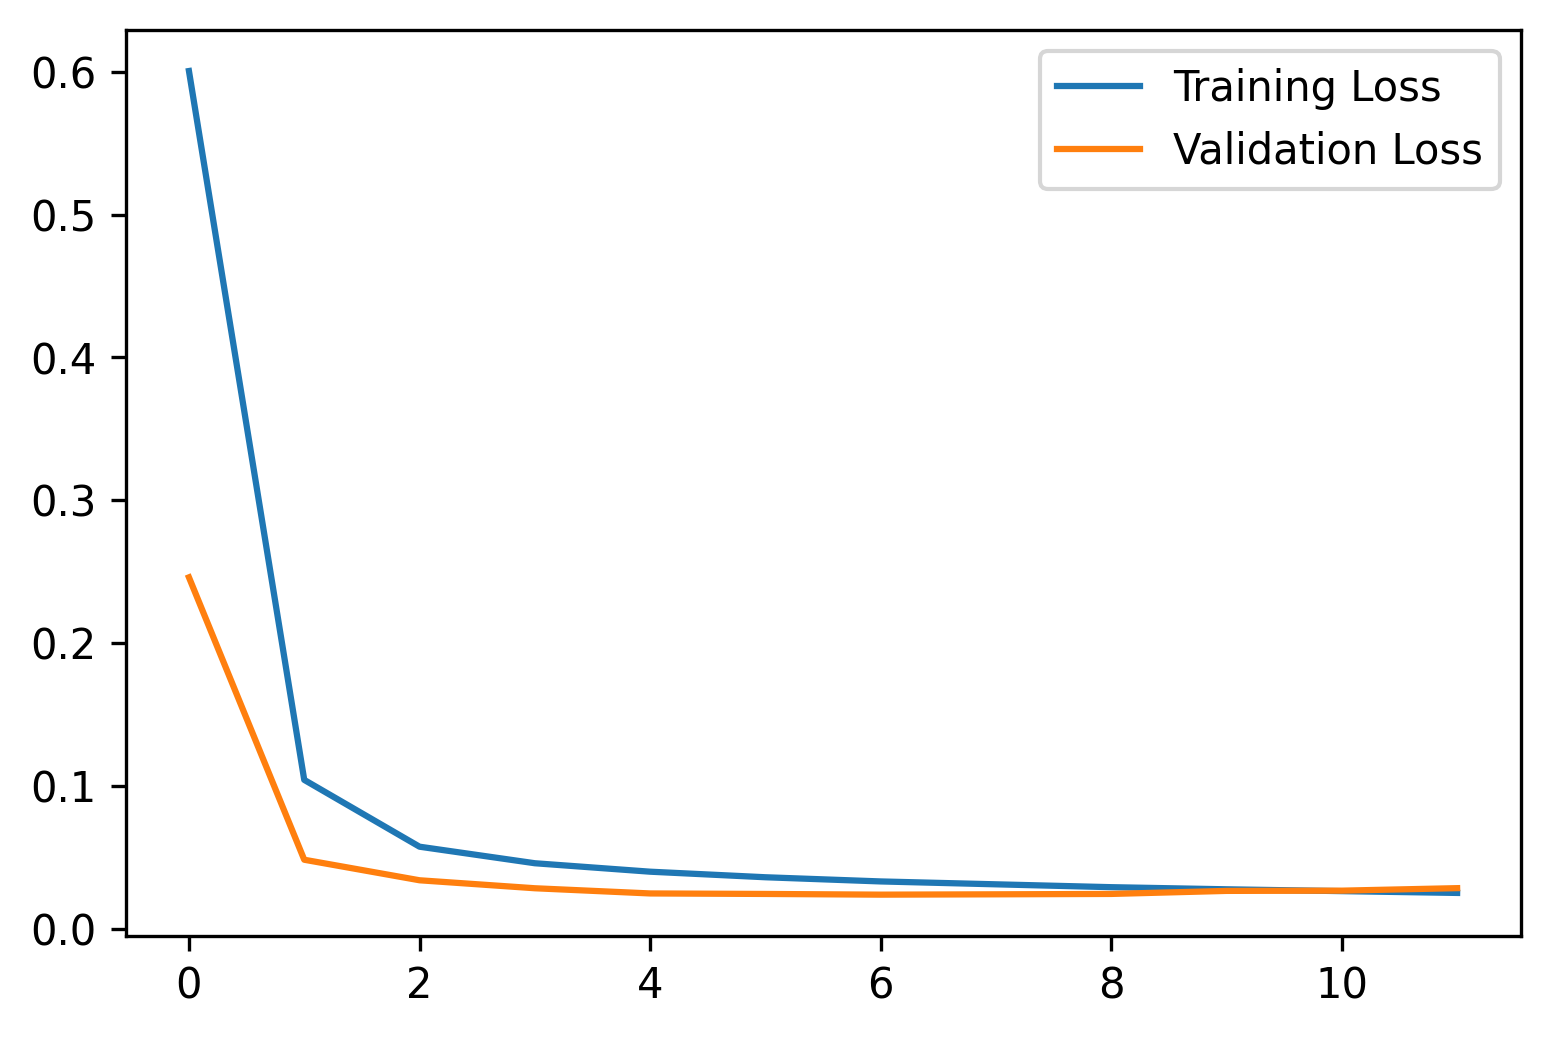

In [16]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

### Detecting anomalies

We will detect anomalies by determining how well our model can reconstruct
the input data.


1.   Find MAE loss on training samples.
2.   Find max MAE loss value. This is the worst our model has performed trying
to reconstruct a sample. We will make this the `threshold` for anomaly
detection.
3.   If the reconstruction loss for a sample is greater than this `threshold`
value then we can infer that the model is seeing a pattern that it isn't
familiar with. We will label this sample as an `anomaly`.

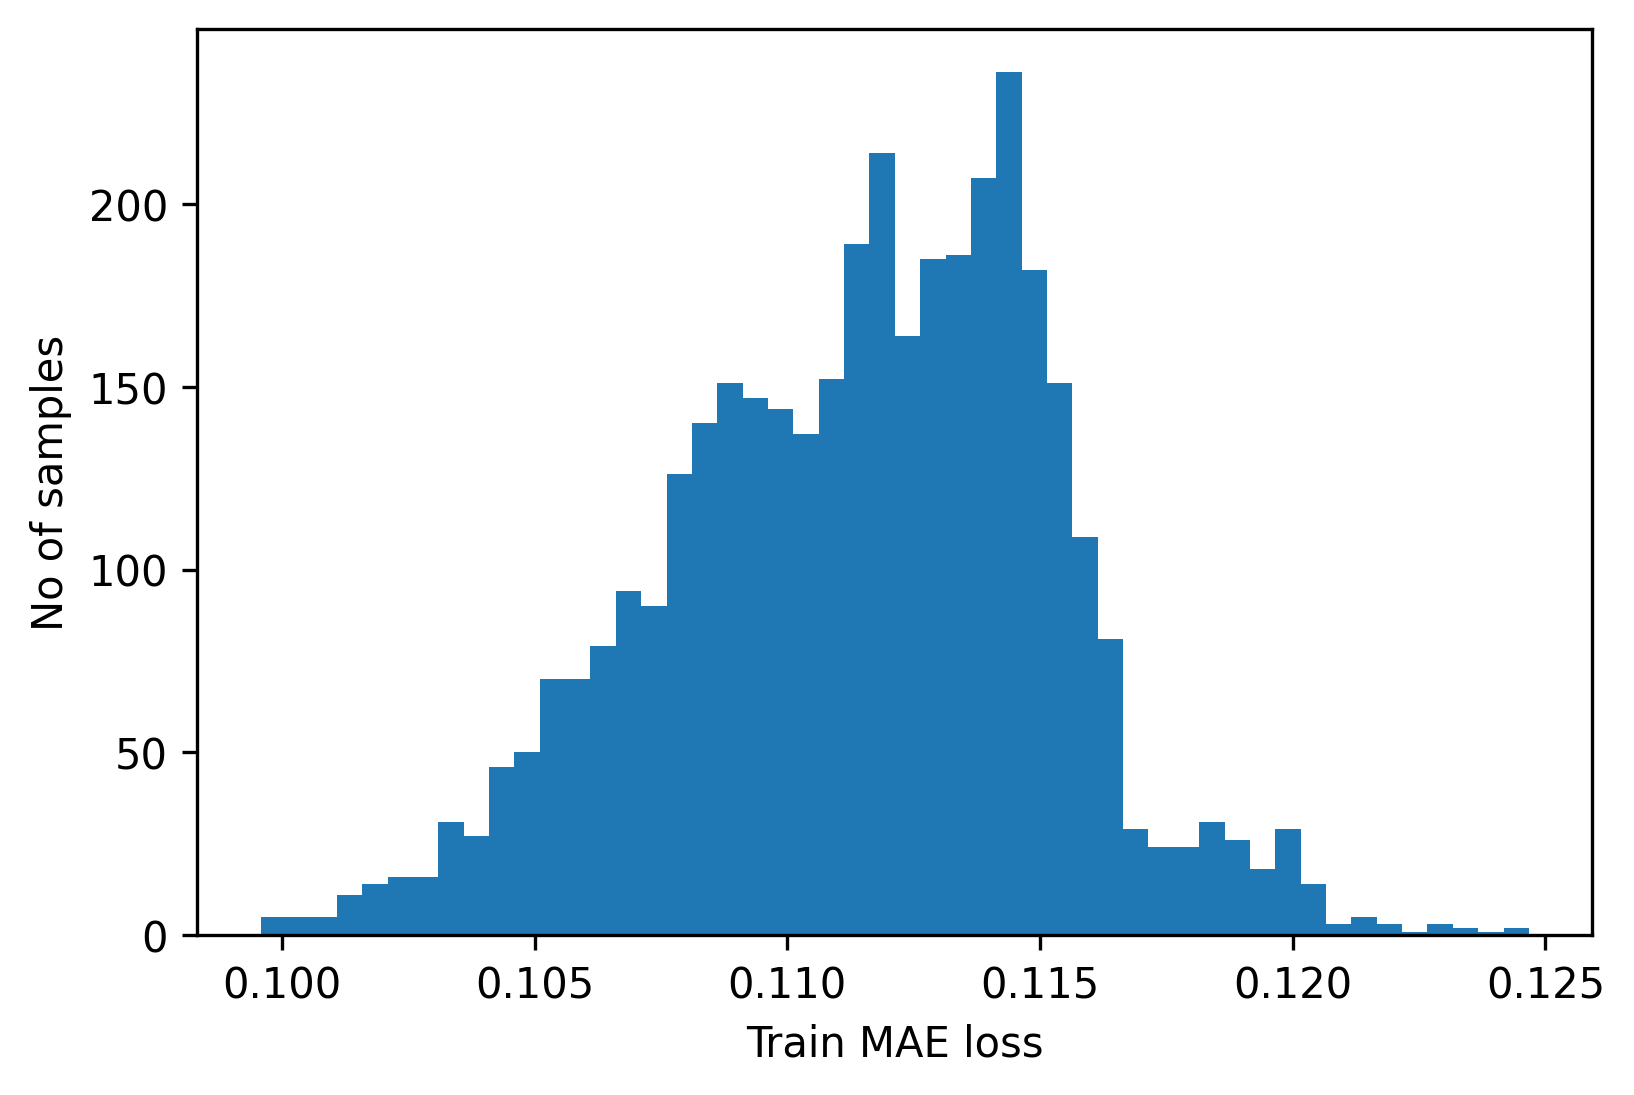

Reconstruction error threshold:  0.124675254820985


In [17]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

#### Compare recontruction

Just for fun, let's see how our model has recontructed the first sample.
This is the 288 timesteps from day 1 of our training dataset.

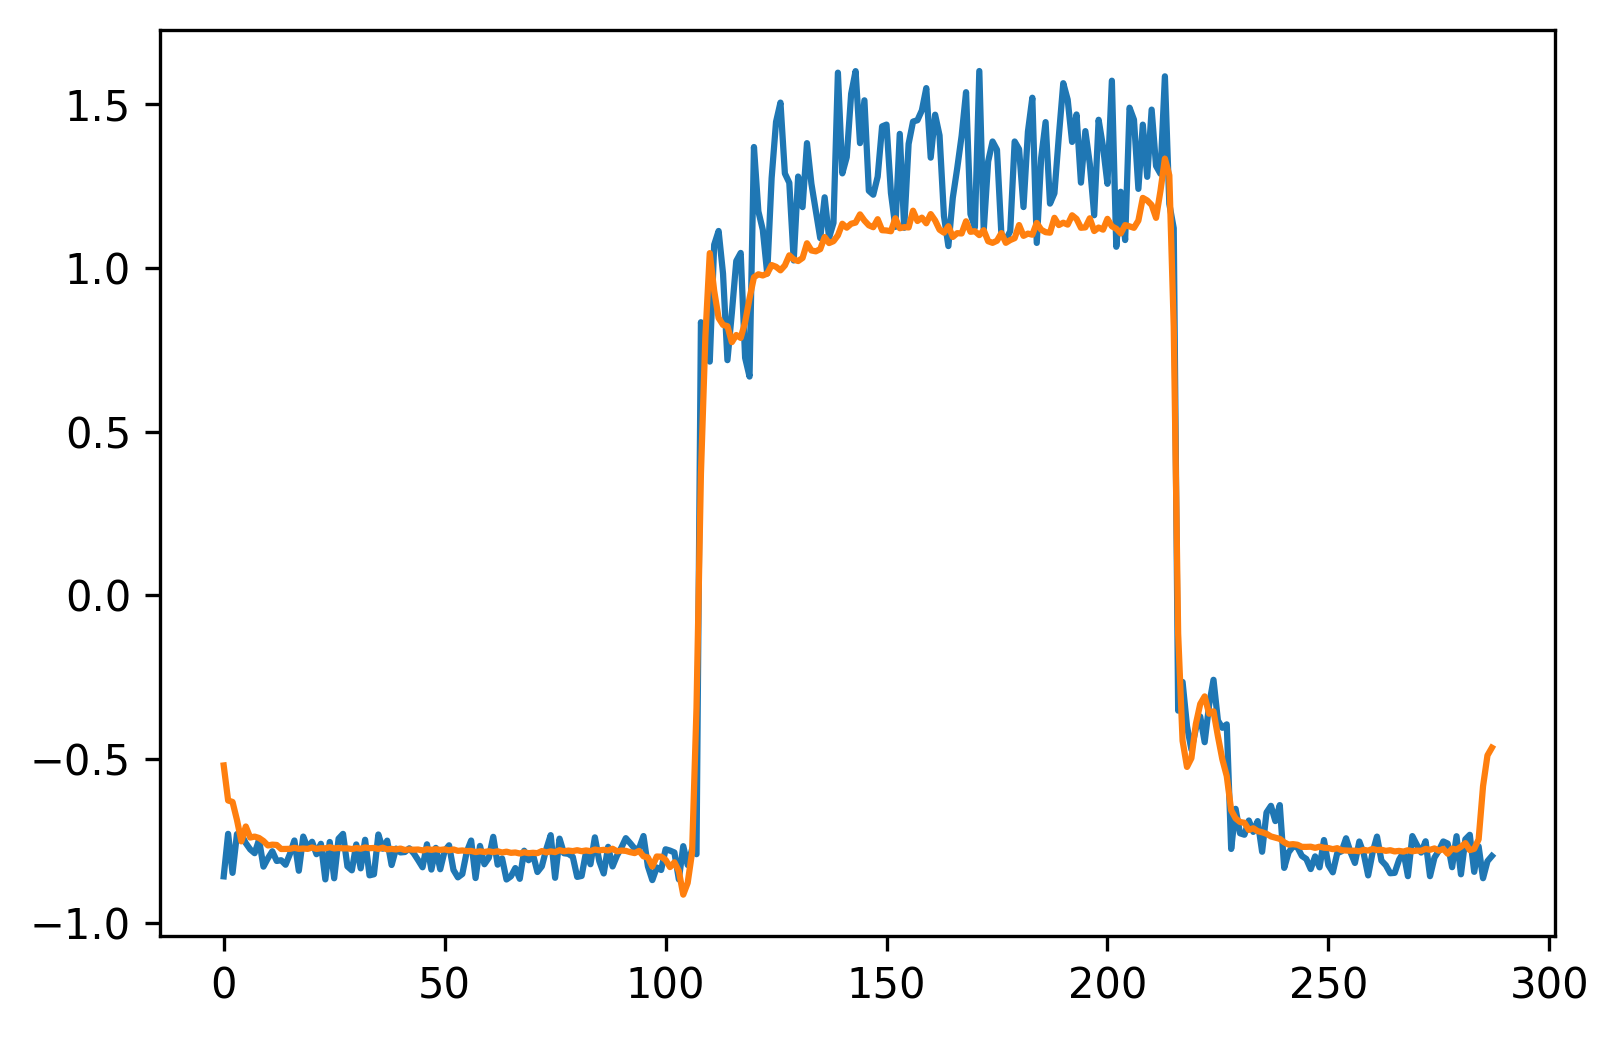

In [18]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

#### Prepare test data

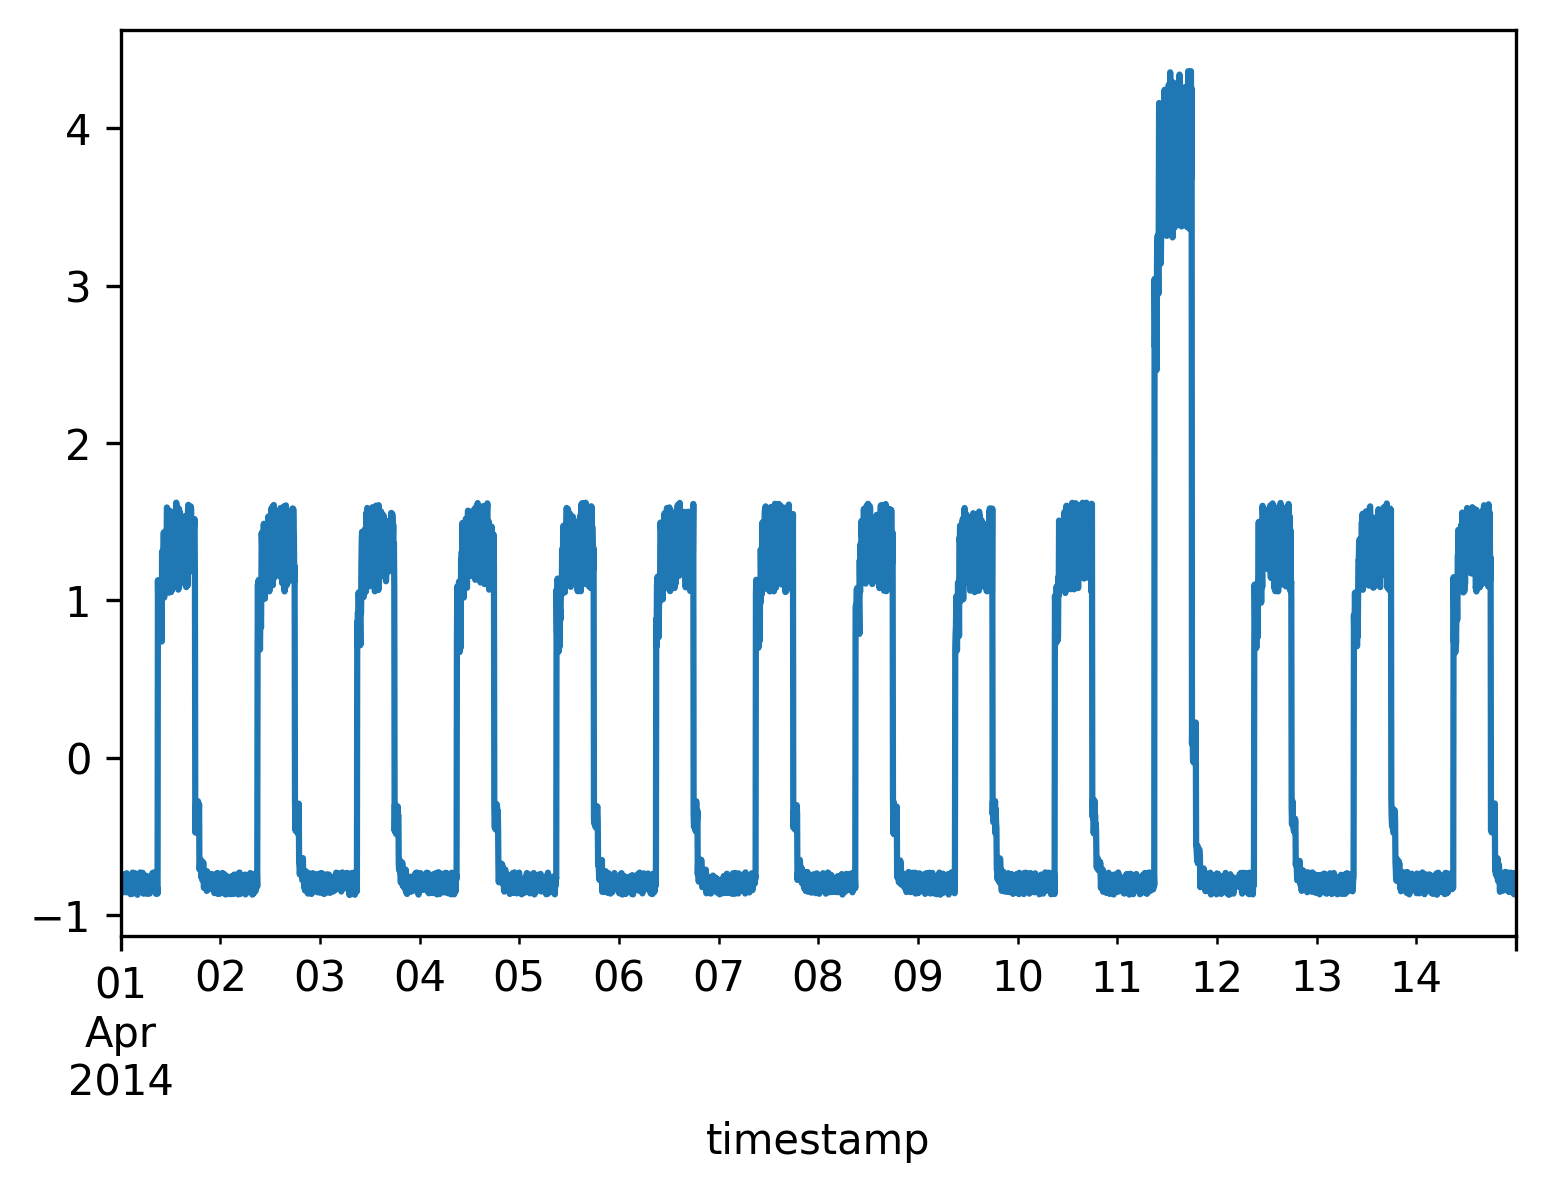

Test input shape:  (3745, 288, 1)


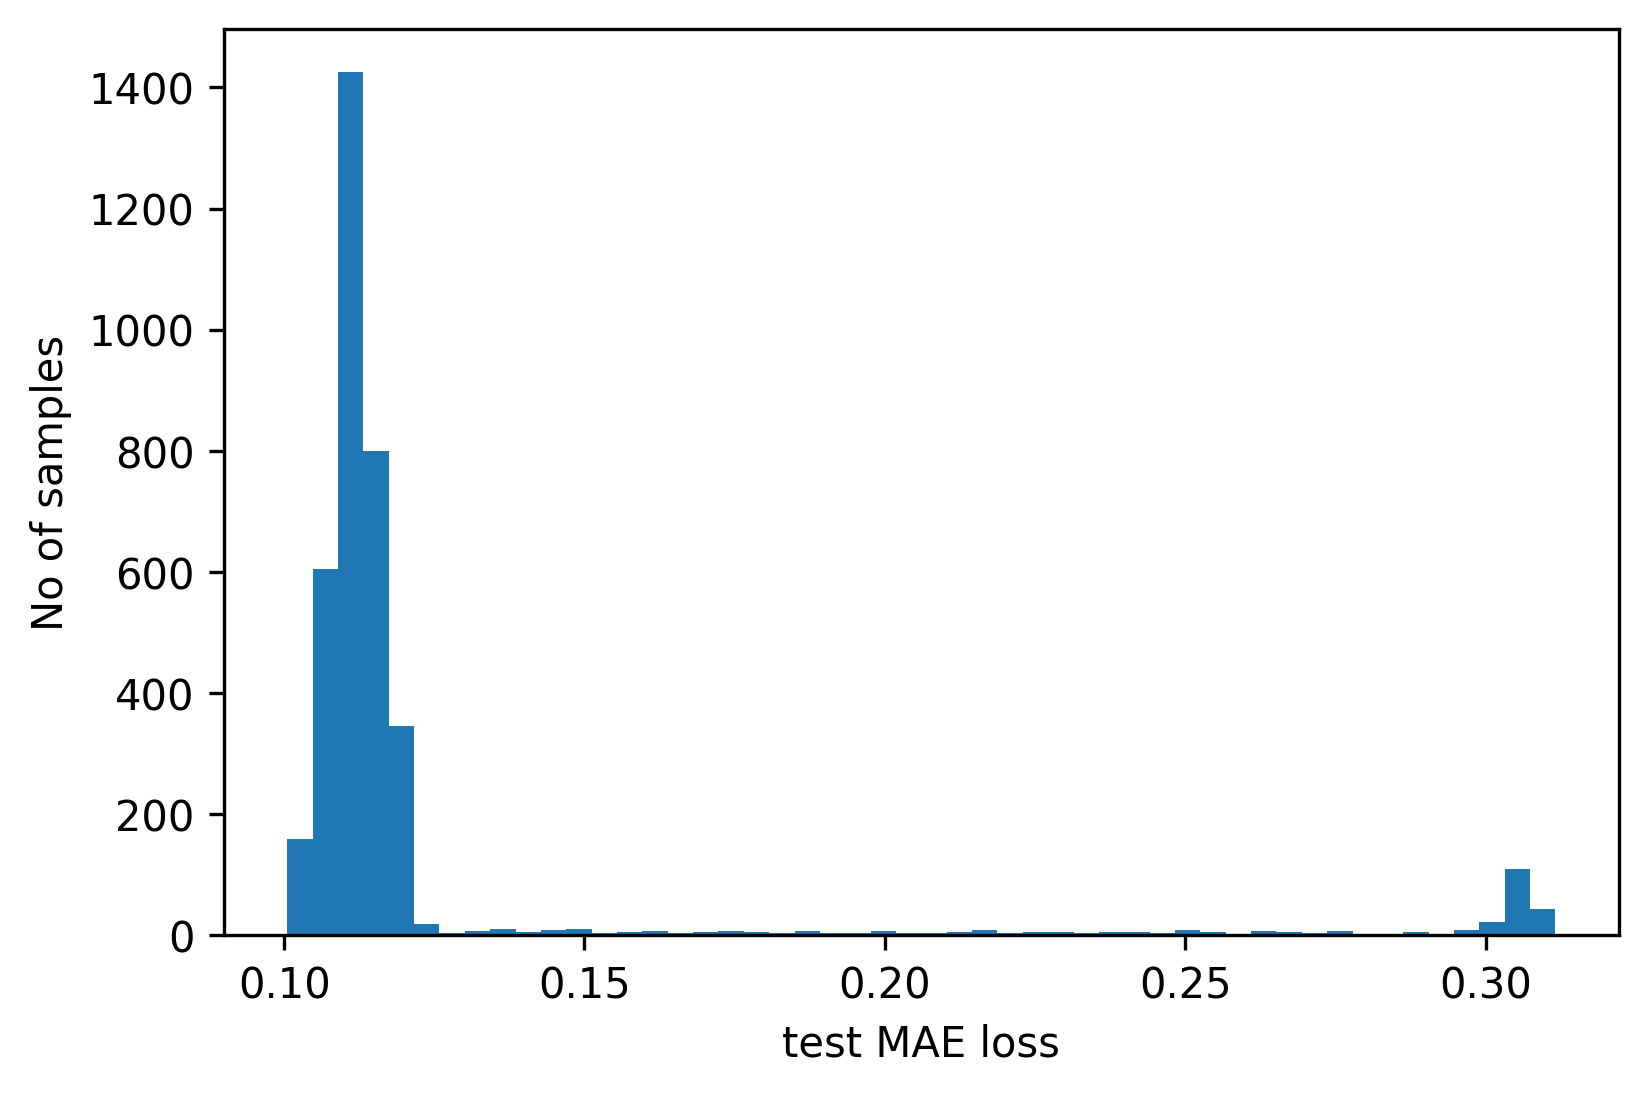

Number of anomaly samples:  398
Indices of anomaly samples:  (array([1650, 1651, 1652, 1653, 2516, 2702, 2703, 2704, 2705, 2706, 2707,
       2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718,
       2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729,
       2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740,
       2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751,
       2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762,
       2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773,
       2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784,
       2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795,
       2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806,
       2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817,
       2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828,
       2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2

In [19]:

df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

### Plot anomalies

We now know the samples of the data which are anomalies. With this, we will
find the corresponding `timestamps` from the original test data. We will be
using the following method to do that:

Let's say time_steps = 3 and we have 10 training values. Our `x_train` will
look like this:

- 0, 1, 2
- 1, 2, 3
- 2, 3, 4
- 3, 4, 5
- 4, 5, 6
- 5, 6, 7
- 6, 7, 8
- 7, 8, 9

All except the initial and the final time_steps-1 data values, will appear in
`time_steps` number of samples. So, if we know that the samples
[(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point
5 is an anomaly.

In [20]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

Let's overlay the anomalies on the original test data plot.

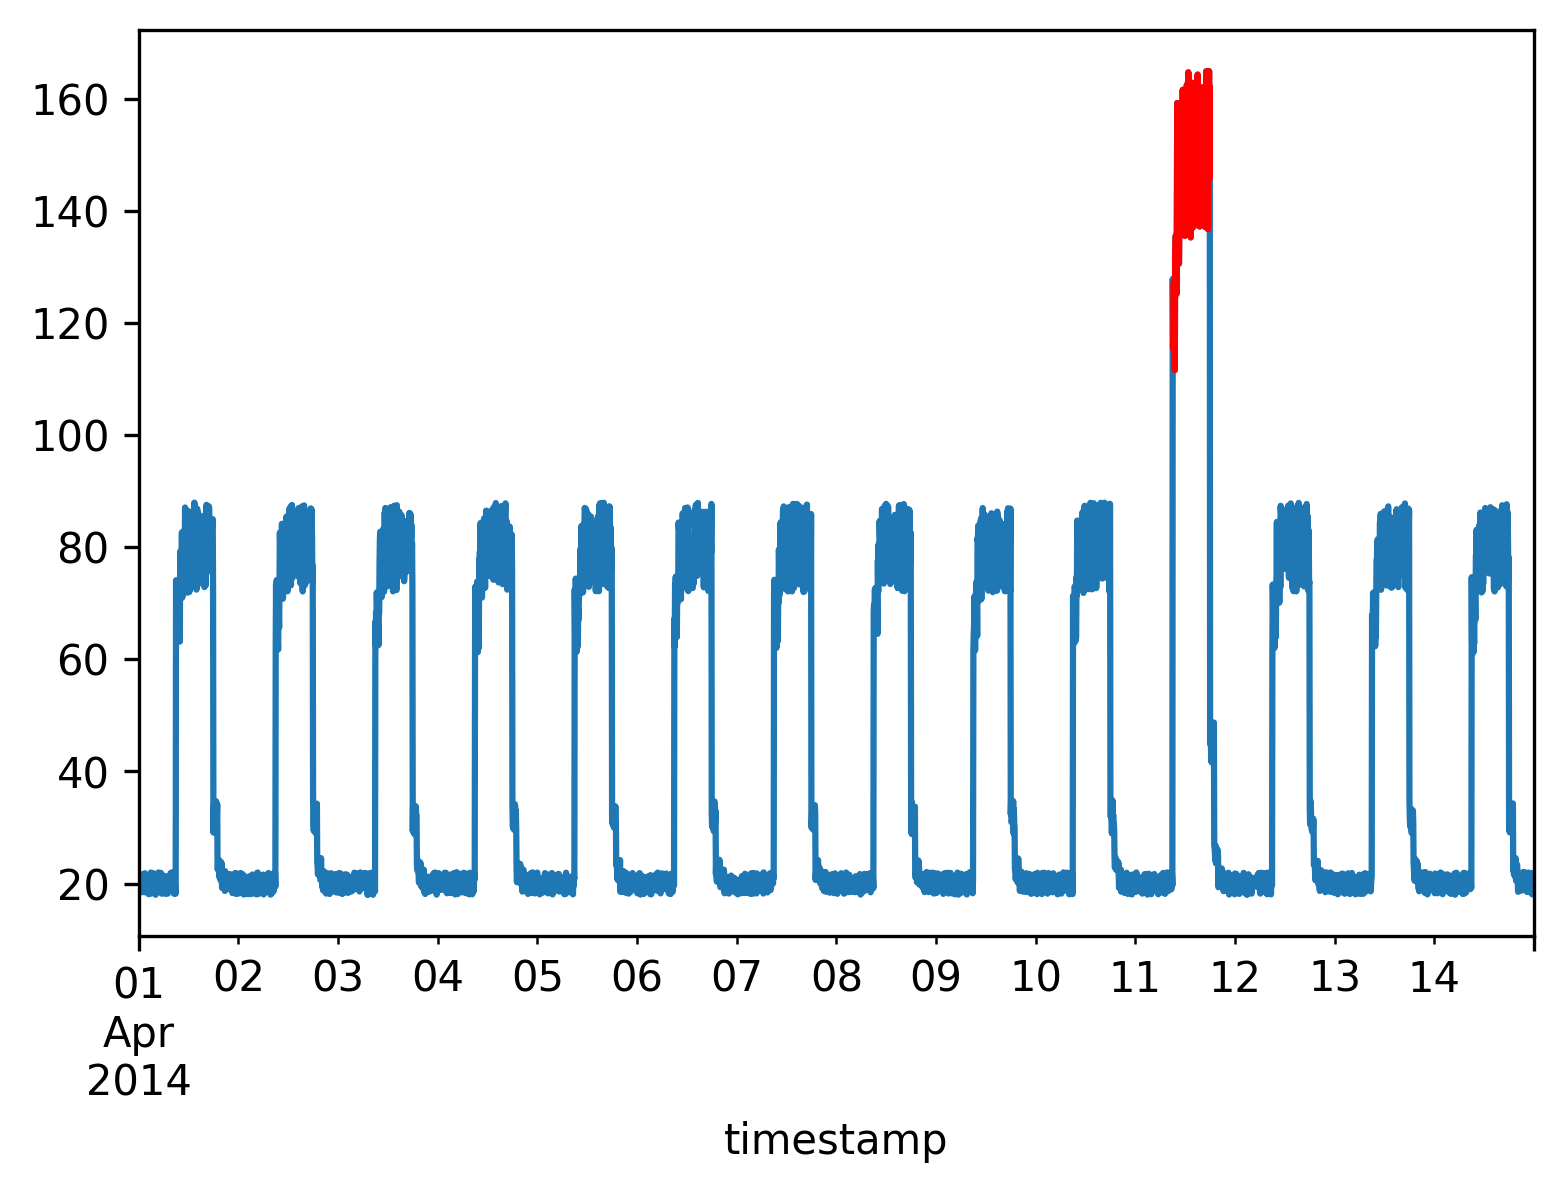

In [21]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()